### ¬øQU√â ES K-MEANS?

k-Means¬†es un algoritmo de¬†aprendizaje no supervisado¬†que **agrupa datos en¬†k cl√∫steres**¬†bas√°ndose en la similitud entre ellos. Funciona asignando puntos a los centroides m√°s cercanos y ajustando estos centroides iterativamente hasta encontrar la mejor agrupaci√≥n.

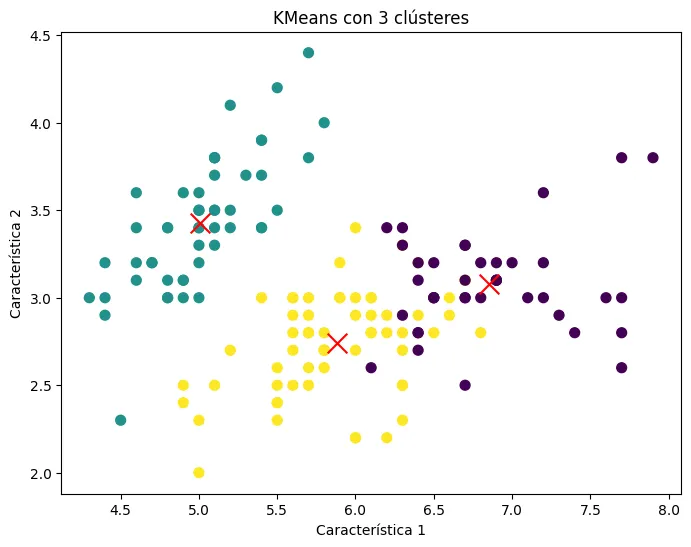

Este algoritmo se usa para segmentaci√≥n de clientes¬†en marketing, compresi√≥n de im√°genes¬†(reducci√≥n de colores), agrupamiento de documentos¬†o textos o detecci√≥n de patrones¬†en datos sin etiquetas.

Un¬†**cl√∫ster**¬†es un grupo de datos que comparten similitudes entre s√≠ y son diferentes a los datos de otros grupos. En t√©rminos simples, el¬†**clustering**¬†es una t√©cnica que nos permite organizar datos sin etiquetas en grupos significativos.

- Cada cl√∫ster tiene un¬†**centroide**¬†(un punto representativo del grupo).
- Los puntos de datos en el mismo cl√∫ster son¬†**m√°s similares**¬†entre s√≠ que con los de otros cl√∫steres.

Existen diferentes enfoques para agrupar datos:

1. **Particional (como k-Means):**¬†Divide los datos en¬†**k grupos**¬†bas√°ndose en la distancia a los centroides.
2. **Jer√°rquico:**¬†Crea una estructura en forma de √°rbol para definir los grupos.
3. **Basado en densidad (como DBSCAN):**¬†Agrupa puntos densamente conectados y detecta outliers.

### **¬øC√ìMO K-MEANS ASIGNA PUNTOS A CENTROIDES Y LOS RECALCULA?**

El algoritmo¬†**k-Means**¬†funciona en¬†dos pasos:

1. **Asignaci√≥n de puntos a centroides**¬†(Agrupaci√≥n)
2. **Recalculaci√≥n de centroides**¬†(Actualizaci√≥n)

Se repite hasta que los centroides dejan de cambiar significativamente.

| Paso                                  | Desarrollo                                                                                                         | Ejemplo                                                                                                 | Consideraciones                                                                                               |
| ------------------------------------- | ------------------------------------------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------- |
| 1\. Inicializaci√≥n de centroides      | Se seleccionan aleatoriamente¬†k puntos¬†en el espacio de datos como los centroides iniciales.                       | Si¬†k=3, se eligen 3 puntos al azar en el espacio de datos.                                              | La elecci√≥n aleatoria puede afectar el resultado. Se recomienda usar¬†k-Means++¬†para una mejor inicializaci√≥n. |
| 2\. Asignaci√≥n de puntos a centroides | Cada punto se asigna al¬†centroide m√°s cercano¬†usando la distancia euclidiana.                                      | Si un punto est√° m√°s cerca del centroide rojo que del azul o verde, se asigna al cl√∫ster rojo.          | Un mal n√∫mero de k puede llevar a grupos incorrectos. Hay que probar distintos valores.                       |
| 3\. Recalculaci√≥n de centroides       | Se actualizan los centroides tomando el¬†promedio de los puntos asignados¬†a cada cl√∫ster.                           | Si un cl√∫ster tiene los puntos¬†(2,3)(2,3),¬†(3,4)(3,4)¬†y¬†(4,5)(4,5), el nuevo centroide ser√°¬†(3,4)(3,4). | En cada iteraci√≥n, los centroides se mueven, reorganizando los grupos.                                        |
| 4\. Repetici√≥n del proceso            | Se repiten los pasos 2 y 3 hasta que los centroides dejen de moverse o se alcance un n√∫mero m√°ximo de iteraciones. | Si los centroides ya no cambian en la iteraci√≥n 10, el algoritmo se detiene.                            | Puede ser necesario establecer un¬†l√≠mite de iteraciones¬†para evitar bucles innecesarios.                      |

### SINTAXIS B√ÅSICA CON SCIKIT LEARN

[[-0.05021989 -0.8812048   0.34773781  0.2815273 ]
 [-1.01457897  0.82794104 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
135.03727426139685


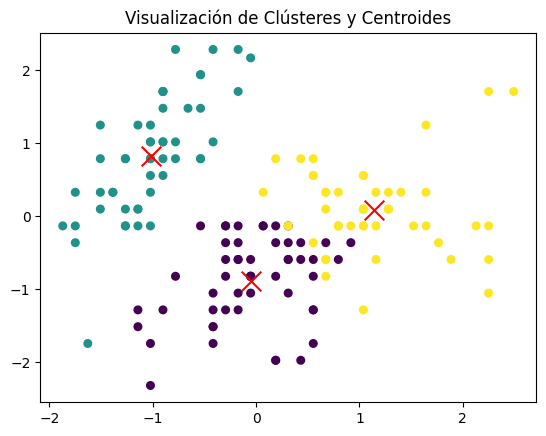

In [42]:
# Importamos el algoritmo K-Means
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Cargamos el dataset de iris y creamos un dataframe a partir de el
iris = load_iris()
# Definimos las caracter√≠sticas de las clases del dataset
X = iris.data
y = iris.target # Definimos el target (Aunque no lo usaremos en el clustering)

# Escalamos las columnas del dataframe
scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X)

# 2. Gesti√≥n de outliers (usaremos el rango intercuart√≠lico para detectar outliers)
Q1 = np.percentile(X_scaled , 25, axis=0)
Q3 = np.percentile(X_scaled , 75, axis=0)
IQR = Q3 - Q1
outliers_condition = ((X_scaled  < (Q1 - 1.5 * IQR)) | (X_scaled  > (Q3 + 1.5 * IQR)))

# Sustituir outliers con los valores m√°s cercanos dentro del rango permitido
X_scaled_outliers_handled = np.copy(X_scaled)
for i in range(X_scaled.shape[1]):
    X_scaled_outliers_handled[:, i] = np.clip(X_scaled_outliers_handled[:, i],
                                              Q1[i] - 1.5 * IQR[i], Q3[i] + 1.5 * IQR[i])

# Creamos una instancia del modelo K-means
kmeans = KMeans(n_clusters=3,  # N√∫mero de cl√∫steres que deseas
                init='k-means++',  # M√©todo para inicializar los centroides (mejor para evitar puntos aleatorios)
                max_iter=300,  # N√∫mero m√°ximo de iteraciones para la convergencia
                n_init=10,  # N√∫mero de veces que el algoritmo se ejecuta con diferentes centroides iniciales
                random_state=42)  # Asegura que los resultados sean reproducibles

# Entrenar el modelo
kmeans.fit(X_scaled_outliers_handled)  # X es tu conjunto de datos ya escalado. fit_predict(X): Ajusta el modelo y devuelve las etiquetas (cl√∫steres) a las que cada punto pertenece. Es m√°s eficiente si no necesitas separar el ajuste y la predicci√≥n.
labels = kmeans.fit_predict(X_scaled_outliers_handled) #predict(X): Predice el cl√∫ster al que pertenecer√°n nuevos puntos (despu√©s de haber entrenado el modelo).

# Ver los resultados del modelo
print(kmeans.cluster_centers_) # kmeans.cluster_centers_: Los centroides de los cl√∫steres. Es un array que te muestra las coordenadas de cada centroide.
print(kmeans.labels_) # kmeans.labels_: Las etiquetas o cl√∫steres asignados a cada punto de los datos. Esto te dice a qu√© cl√∫ster pertenece cada muestra.
print(kmeans.inertia_) # kmeans.inertia_: La suma de las distancias al cuadrado de cada punto a su centroide. Es una m√©trica que indica cu√°n compactos son los cl√∫steres.

# Visualizaci√≥n
# Visualizar los puntos de datos
plt.scatter(X_scaled_outliers_handled[:, 0], X_scaled_outliers_handled[:, 1], c=kmeans.labels_, cmap='viridis', s=30)

# Visualizar los centroides
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)

plt.title('Visualizaci√≥n de Cl√∫steres y Centroides')
plt.show()


- `KMeans()`
    - **`n_clusters`**:
        
        N√∫mero de cl√∫steres que el algoritmo debe encontrar en los datos. Este es un par√°metro crucial que debes definir (lo que determina cu√°ntos grupos deseas).
        
    - **`init`**:
        
        M√©todo para inicializar los centroides.
        
        - **`'k-means++'`**¬†(por defecto) es el m√°s usado porque selecciona los centroides iniciales de manera inteligente para mejorar la convergencia.
        - **`'random'`**: selecciona los centroides de manera aleatoria.
    - **`max_iter`**:
        
        N√∫mero m√°ximo de iteraciones que realizar√° el algoritmo para encontrar la soluci√≥n final.
        
    - **`n_init`**:
        
        N√∫mero de veces que el algoritmo se ejecutar√° con diferentes inicializaciones de centroides. El resultado ser√° el mejor de estas ejecuciones.
        
    - **`random_state`**:
        
        Semilla para controlar la aleatoriedad del algoritmo y garantizar que los resultados sean reproducibles.

Para el siguiente paso k-Means necesita que **el n√∫mero de cl√∫steres (k) sea elegido antes de ejecutarse**. Pero, ¬øc√≥mo sabemos cu√°l es el valor √≥ptimo de k? El algoritmo¬†**k-Means**¬†requiere definir previamente el n√∫mero de cl√∫steres (**k**), pero elegir el valor correcto no siempre es trivial. Si se elige un¬†**k**¬†demasiado peque√±o, los grupos pueden ser muy generales y mezclar datos distintos. Si¬†**k**¬†es demasiado grande, se pueden generar agrupaciones innecesarias y perder generalizaci√≥n.

Existen varios m√©todos para determinar el n√∫mero √≥ptimo de cl√∫steres. Los dos m√°s utilizados son:

- **1. M√©todo del codo (Elbow Method)**
    
    Este m√©todo eval√∫a c√≥mo var√≠a la¬†suma de los errores cuadr√°ticos intra-cl√∫ster (WCSS - Within-Cluster Sum of Squares)¬†al incrementar el n√∫mero de cl√∫steres.
    
    <aside>
    üí°
    
    - **WCSS**¬†mide la distancia entre los puntos de un cl√∫ster y su centroide.
    - A medida que¬†**k aumenta**, WCSS disminuye porque los grupos son m√°s peque√±os y homog√©neos.
    - Sin embargo, en alg√∫n punto, la reducci√≥n en WCSS se vuelve marginal y deja de justificar un¬†**k**¬†mayor.
    - El punto donde la disminuci√≥n se estabiliza se conoce como el¬†**codo**¬†del gr√°fico.
    </aside>
    
    ### **Procedimiento**
    
    1. Ejecutar¬†**k-Means¬†p**ara diferentes valores de¬†**k**¬†(por ejemplo, de 1 a 10).
    2. Calcular WCSS para cada valor de¬†**k**.
    3. Graficar WCSS en funci√≥n de¬†**k**.
    4. Identificar el punto donde la curva empieza a disminuir lentamente (el "codo").
    
    Por ejemplo, supongamos que ejecutamos¬†k-Means¬†en un conjunto de datos y obtenemos el siguiente WCSS:

    | k | WCSS |
    | - | ---- |
    | 1 | 1500 |
    | 2 | 900  |
    | 3 | 500  |
    | 4 | 300  |
    | 5 | 250  |
    | 6 | 240  |

    Si graficamos estos valores, el "codo" aparece en¬†k = 3 o 4, ya que despu√©s de este punto la reducci√≥n en WCSS es m√≠nima.

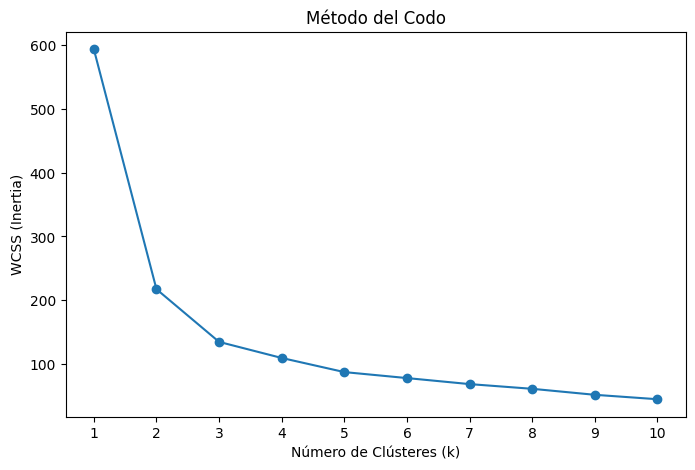

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generar un conjunto de datos artificial con clusters
# X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Calcular la suma de los errores cuadr√°ticos intra-cl√∫ster (WCSS)
wcss = []
k_values = range(1, 11)  # Probar valores de k desde 1 hasta 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_outliers_handled)
    wcss.append(kmeans.inertia_)  # inertia_ almacena la WCSS

# Graficar el m√©todo del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel('N√∫mero de Cl√∫steres (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('M√©todo del Codo')
plt.xticks(k_values)
plt.show()

Podemos apreciar que a partir del 3 la diferencia entre los errores cuadr√°ticos intra-cl√∫ster (WCSS) es min√≠ma por lo que el n¬∫ √≥ptimo de clusteres ser√≠a 3 (Lo cual tiene sentido ya que el dataset iris que hemos utilizado para el ejemplo posee 3 clases de flores diferentes).

- `make_blobs()`
    
    El m√©todo¬†`make_blobs`¬†es una funci√≥n de¬†scikit-learn¬†que se utiliza para **generar un conjunto de datos sint√©tico (ficticio) de puntos en el espacio**, con un n√∫mero espec√≠fico de cl√∫steres. Es muy √∫til para probar y validar algoritmos de agrupaci√≥n (como¬†k-Means), ya que te permite controlar el n√∫mero de cl√∫steres, su dispersi√≥n y otras caracter√≠sticas sin necesidad de usar un conjunto de datos real.
    
    ### **Par√°metros principales de¬†`make_blobs`:**
    
    - **`n_samples`**:
        
        N√∫mero total de muestras (puntos de datos) a generar. Puede ser un solo n√∫mero entero (para generar el mismo n√∫mero de muestras para todos los cl√∫steres) o una lista con la cantidad de muestras por cl√∫ster.
        
    - **`centers`**:
        
        El n√∫mero de cl√∫steres o las posiciones de los centroides en los que se agrupar√°n los datos.
        
        - Si es un n√∫mero entero, generar√° esa cantidad de cl√∫steres con centroides aleatorios.
        - Si se proporciona una lista de coordenadas, esos ser√°n los centroides exactos de los cl√∫steres.
    - **`cluster_std`**:
        
        La desviaci√≥n est√°ndar de los cl√∫steres, que controla qu√© tan dispersos estar√°n los puntos alrededor de sus centroides. Un valor m√°s bajo significa que los puntos estar√°n m√°s cerca de los centroides y un valor m√°s alto hace que los puntos est√©n m√°s dispersos.
        
    - **`random_state`**:
        
        Permite asegurar la reproducibilidad de los datos generados, es decir, generar siempre el mismo conjunto de datos con el mismo valor de¬†`random_state`.
        
    - **`n_features`**:
        
        El n√∫mero de caracter√≠sticas (dimensiones) de cada punto de datos. Si lo dejas en el valor predeterminado (`2`), los puntos estar√°n en un espacio bidimensional, pero puedes cambiarlo si deseas un espacio con m√°s dimensiones.
        
    - **`shuffle`**:
        
        Si es¬†**True**, mezcla los puntos generados de forma aleatoria. Si es¬†**False**, mantiene el orden de los puntos generados. Por defecto es¬†**True**.
        

### **Consideraciones**

- Este m√©todo es √∫til cuando hay una diferencia clara en la reducci√≥n de WCSS.
- En algunos casos, el codo no es evidente y se deben usar m√©todos complementarios.

- **2. Coeficiente de Silueta**
    
    Este m√©todo eval√∫a¬†si est√°n bien agrupados los puntos dentro de cada cl√∫ster¬†comparando:
    
    1. La¬†cohesi√≥n intra-cl√∫ster¬†(lo cerca est√°n los puntos de su centroide).
    2. La¬†separaci√≥n inter-cl√∫ster¬†(qu√© tan lejos est√°n de los otros cl√∫steres).
    
    <aside>
    üí°
    
    El coeficiente de silueta var√≠a entre¬†**-1 y 1**:
    
    - **Cercano a 1**: Los puntos est√°n bien agrupados dentro de su cl√∫ster.
    - **Cercano a 0**: Los puntos est√°n en el l√≠mite entre cl√∫steres, lo que indica que k no es √≥ptimo.
    - **Negativo**: Los puntos est√°n asignados al cl√∫ster incorrecto.
    </aside>
    
    ### **Procedimiento**
    
    1. Ejecutar¬†**k-Means**¬†para distintos valores de¬†**k**.
    2. Calcular el coeficiente de silueta para cada punto.
    3. Promediar los coeficientes y graficarlos en funci√≥n de¬†**k**.
    4. Elegir el¬†**k**¬†donde el coeficiente de silueta es m√°ximo.
    
    Supongamos que probamos diferentes valores de¬†**k**¬†y obtenemos estos coeficientes:
    
    | k | Coeficiente de Silueta |
    | - | ---------------------- |
    | 2 | 0.45                   |
    | 3 | 0.55                   |
    | 4 | 0.62                   |
    | 5 | 0.48                   |
    | 6 | 0.43                   |

    Aqu√≠, el mejor valor es¬†k = 4¬†porque tiene el coeficiente de silueta m√°s alto.

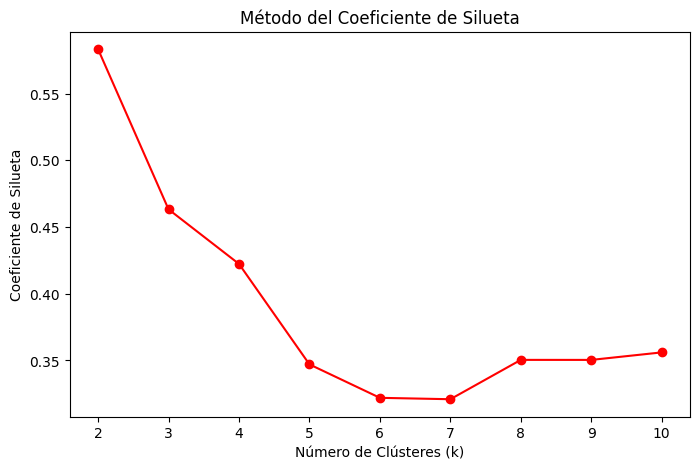

In [44]:
from sklearn.metrics import silhouette_score

silhouette_scores = []  # Almacenar los coeficientes de silueta

for k in range(2, 11):  # No se puede calcular silueta para k=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled_outliers_handled)  # Obtener las etiquetas asignadas a los puntos
    score = silhouette_score(X_scaled_outliers_handled, labels)  # Calcular el coeficiente de silueta
    silhouette_scores.append(score)

# Graficar el coeficiente de silueta en funci√≥n de k
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='red')
plt.xlabel('N√∫mero de Cl√∫steres (k)')
plt.ylabel('Coeficiente de Silueta')
plt.title('M√©todo del Coeficiente de Silueta')
plt.xticks(range(2, 11))
plt.show()


Apreciamos que el mejor n¬∫ de clusters seg√∫n la puntuaci√≥n ser√≠a 2, pero juntando estos resultados con el m√©todo del codo determinamos que el √≥ptimo ser√≠a ``3``.

### **Consideraciones**

- Es √∫til cuando no hay un codo claro en la curva de WCSS.
- No siempre funciona bien en conjuntos de datos con estructuras muy complejas.

| M√©todo                 | Ventajas                                                                    | Desventajas                                             |
| ---------------------- | --------------------------------------------------------------------------- | ------------------------------------------------------- |
| M√©todo del codo        | F√°cil de interpretar, √∫til para detectar cambios bruscos en la variabilidad | Puede ser subjetivo si el codo no es claro              |
| Coeficiente de silueta | Eval√∫a la calidad de la agrupaci√≥n, no solo la dispersi√≥n                   | Puede ser menos preciso en datos con formas irregulares |

### Aplicamos configuraciones √≥ptimas

Silhouette Score para el modelo con 3 cl√∫steres: 0.48275167016872444


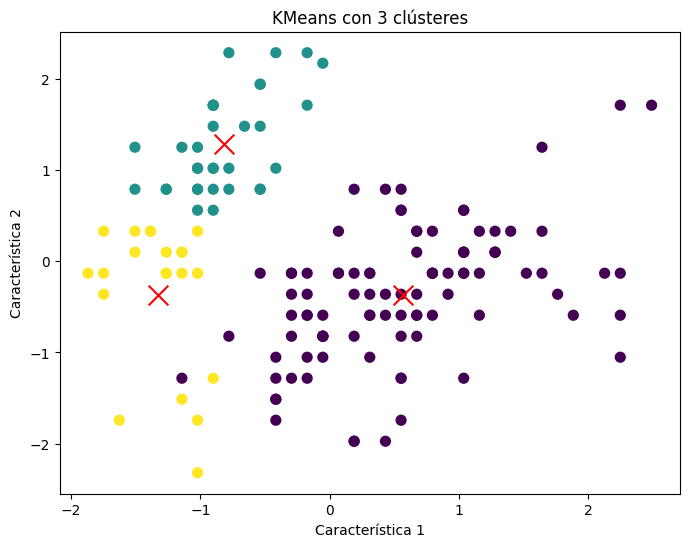

N√∫mero √≥ptimo de cl√∫steres seg√∫n el M√©todo del Codo y el Coeficiente de Silueta: 3
Centroides de los cl√∫steres:
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.28059159 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.36765712 -1.13723572 -1.11486192]]


In [45]:
# A partir de la gr√°fica, elegimos el n√∫mero √≥ptimo de cl√∫steres (suponemos k=3)
optimal_k = 3

# 5. Aplicar KMeans con el n√∫mero √≥ptimo de cl√∫steres
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled_outliers_handled)

# 6. Evaluaci√≥n del modelo usando Silhouette Score con el n√∫mero √≥ptimo de cl√∫steres
sil_score_optimal = silhouette_score(X_scaled_outliers_handled, kmeans.labels_)
print(f"Silhouette Score para el modelo con {optimal_k} cl√∫steres: {sil_score_optimal}")

# 7. Visualizar los resultados de KMeans
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled_outliers_handled[:, 0], X_scaled_outliers_handled[:, 1], c=kmeans.labels_, cmap='viridis', s=50)  # Graficamos los puntos de datos coloreados por su cl√∫ster
centroids = kmeans.cluster_centers_  # Los centroides de los cl√∫steres
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)  # Graficamos los centroides en rojo
plt.title(f'KMeans con {optimal_k} cl√∫steres')
plt.xlabel('Caracter√≠stica 1')
plt.ylabel('Caracter√≠stica 2')
plt.show()

# 8. Resultados finales
print(f'N√∫mero √≥ptimo de cl√∫steres seg√∫n el M√©todo del Codo y el Coeficiente de Silueta: {optimal_k}')
print('Centroides de los cl√∫steres:')
print(kmeans.cluster_centers_)

## M√âTRICAS DE EVALUACI√ìN
1. **Inercia** (Inertia/WCSS): La inercia es la suma de las distancias cuadradas entre cada punto y el centroide del cl√∫ster al que pertenece. Se usa com√∫nmente para determinar el n√∫mero √≥ptimo de cl√∫steres a trav√©s del¬†M√©todo del Codo.

    - **Interpretaci√≥n**: Un valor de inercia bajo sugiere que los puntos est√°n cerca de sus centroides, indicando un buen clustering, pero siempre disminuir√° a medida que aumente el n√∫mero de cl√∫steres, por lo que debe usarse en combinaci√≥n con otras m√©tricas.

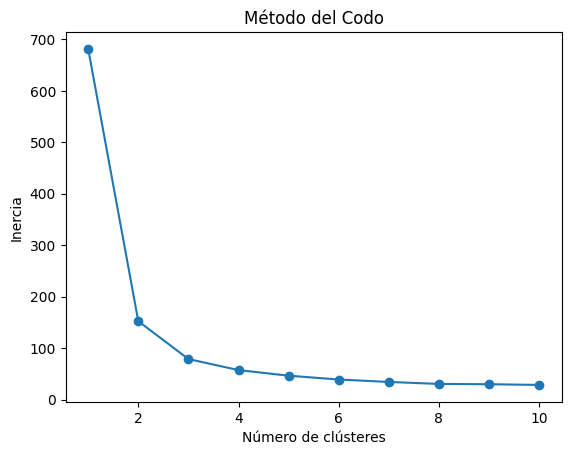

In [46]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Cargar el dataset Iris
data = load_iris()
X = data.data

# Evaluar la inercia para diferentes n√∫meros de cl√∫steres
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar la inercia
plt.plot(range(1, 11), inertia, marker='o')
plt.title('M√©todo del Codo')
plt.xlabel('N√∫mero de cl√∫steres')
plt.ylabel('Inercia')
plt.show()

2. **Silhouette Score**: Mide qu√© tan similar es un punto a su propio cl√∫ster en comparaci√≥n con otros cl√∫steres. Se calcula como la diferencia entre la distancia promedio dentro del cl√∫ster (a) y la distancia al cl√∫ster m√°s cercano (b).

    - **Interpretaci√≥n**: El valor var√≠a de¬†**1 a +1**:
        - **+1**: El punto est√° bien agrupado.
        - **0**: El punto est√° en el borde de dos cl√∫steres.
        - **1**: El punto est√° mal agrupado.

In [47]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Crear modelo KMeans con k=3 (por ejemplo)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Calcular el Silhouette Score
sil_score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.551191604619592


3. **M√©todo del Codo**: Es una t√©cnica para determinar el n√∫mero √≥ptimo de cl√∫steres, observando la inercia para diferentes valores de¬†k. El n√∫mero √≥ptimo se encuentra donde la disminuci√≥n de la inercia comienza a desacelerarse (punto de inflexi√≥n). El¬†M√©todo del Codo¬†depende de la inercia. Se puede usar la gr√°fica de inercia para encontrar el punto de inflexi√≥n.

4. **Homogeneidad, Completitud y V-Measur:**
    - **Homogeneidad**: Mide si los puntos dentro de un cl√∫ster pertenecen a la misma clase (etiqueta).
    - **Completitud**: Mide si todos los puntos de una clase est√°n dentro del mismo cl√∫ster.
    - **V-Measure**: Combina homogeneidad y completitud en una sola m√©trica.
        - **Interpretaci√≥n**:
            - **1**: Indica un buen clustering en t√©rminos de homogeneidad/completitud.
            - **0**: Indica que no hay coincidencia entre las etiquetas y los cl√∫steres.

In [48]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.cluster import KMeans

# Ejemplo con etiquetas verdaderas (se requiere tener etiquetas verdaderas)
# Cargar el conjunto de datos Iris, que tiene etiquetas conocidas
y_true = load_iris().target

# Aplicar KMeans con k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Evaluar homogeneidad, completitud y V-Measure
homogeneity = homogeneity_score(y_true, kmeans.labels_)
completeness = completeness_score(y_true, kmeans.labels_)
v_measure = v_measure_score(y_true, kmeans.labels_)

print(f'Homogeneidad: {homogeneity}')
print(f'Completitud: {completeness}')
print(f'V-Measure: {v_measure}')

Homogeneidad: 0.7364192881252849
Completitud: 0.7474865805095324
V-Measure: 0.7419116631817836


5. **Davies-Bouldin Index:** Mide la relaci√≥n entre la dispersi√≥n dentro de los cl√∫steres y la distancia entre los centroides de los cl√∫steres. Cuanto m√°s bajo sea el √≠ndice, mejor ser√° el clustering.

    - **Interpretaci√≥n**: Un valor m√°s bajo indica que los cl√∫steres son compactos y bien separados.


In [49]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

# Crear el modelo KMeans con k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Evaluar el Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeans.labels_)
print(f'Davies-Bouldin Index: {db_score}')

Davies-Bouldin Index: 0.6660385791628493


6. **Dunn Index:** El Dunn Index eval√∫a la separaci√≥n entre los cl√∫steres m√°s cercanos y la dispersi√≥n dentro de los cl√∫steres. Un valor m√°s alto indica que los cl√∫steres est√°n mejor separados y son m√°s compactos
    
    - **Interpretaci√≥n**: Este √≠ndice tambi√©n ayuda a encontrar el n√∫mero √≥ptimo de cl√∫steres.

    Scikit-learn no ofrece una implementaci√≥n directa para el Dunn Index, pero se puede calcular manualmente con el siguiente enfoque:

In [50]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    inter_cluster_distances = []
    intra_cluster_distances = []

    # Calcular las distancias entre los centroides de los cl√∫steres
    for i in unique_labels:
        for j in unique_labels:
            if i != j:
                cluster_i = X[labels == i]
                cluster_j = X[labels == j]
                distance = np.min(pairwise_distances(cluster_i, cluster_j))
                inter_cluster_distances.append(distance)

    # Calcular las distancias dentro de cada cl√∫ster
    for i in unique_labels:
        cluster = X[labels == i]
        distance = np.max(pairwise_distances(cluster))
        intra_cluster_distances.append(distance)

    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

# Aplicar el Dunn Index
dunn_score = dunn_index(X, kmeans.labels_)
print(f'Dunn Index: {dunn_score}')

Dunn Index: 0.10943513103291534


### **VENTAJAS DE K-MEANS**

1. **Simple e intuitivo**: F√°cil de entender y visualizar.
2. **Escalable**: Funciona bien con grandes vol√∫menes de datos.
3. **Eficiente**: R√°pido en comparaci√≥n con otros algoritmos de clustering.
4. **Vers√°til**: Puede aplicarse a diferentes problemas en diversos campos.

---

### **DESVENTAJAS DE K-MEANS**

1. **Depende del n√∫mero de cl√∫steres**: Se debe elegir¬†**k**¬†de manera √≥ptima (con el m√©todo del codo o coeficiente de silueta).
2. **Sensibilidad a centroides iniciales**: Puede converger a diferentes soluciones seg√∫n la inicializaci√≥n.
3. **No funciona bien con formas no esf√©ricas**: Si los cl√∫steres tienen formas complejas, k-Means puede fallar.
4. **Afectado por outliers**: Valores at√≠picos pueden distorsionar los centroides.
5. Asume que los cl√∫steres tienen una¬†**varianza similar**. Esto puede no ser cierto en algunos casos. Si los cl√∫steres tienen diferentes densidades,¬†**k-Means**¬†puede fallar. En estos casos, m√©todos como¬†**DBSCAN**¬†(que es basado en densidad) es m√°s adecuados.